In [1]:
# Se requiere Python ≥ 3.5
import sys;
assert sys.version_info >= (3, 5);

# Se requiere Scikit-Learn ≥ 0.20
import sklearn; 
assert sklearn.__version__ >= "0.20";

# Otros imports
import numpy as np;
import os;

# la línea que sigue, sólo en Colab ...
# %matplotlib inline

import matplotlib as mpl;
import matplotlib.pyplot as plt;

# tamaño del texto en las etiquetas por defecto
mpl.rc('axes',  labelsize=14);
mpl.rc('xtick', labelsize=12);
mpl.rc('ytick', labelsize=12);

In [2]:
import pandas as pd

def load_calculos_prima_data():
    csv_path ="insurance.csv" #trayectoria completa del fichero
    print("leyendo:",csv_path)
    return pd.read_csv(csv_path)

In [3]:
prima_seguro = load_calculos_prima_data()
prima_seguro.head() # La cabeza del fichero

leyendo: insurance.csv


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [4]:
prima_seguro.info() # información de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [5]:
prima_seguro["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [6]:
prima_seguro["smoker"].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [7]:
prima_seguro["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [8]:
prima_seguro.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1338.000000,1338.000000
mean,39.208676,30.664589,1.094918,13270.422265
std,14.055088,6.100313,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


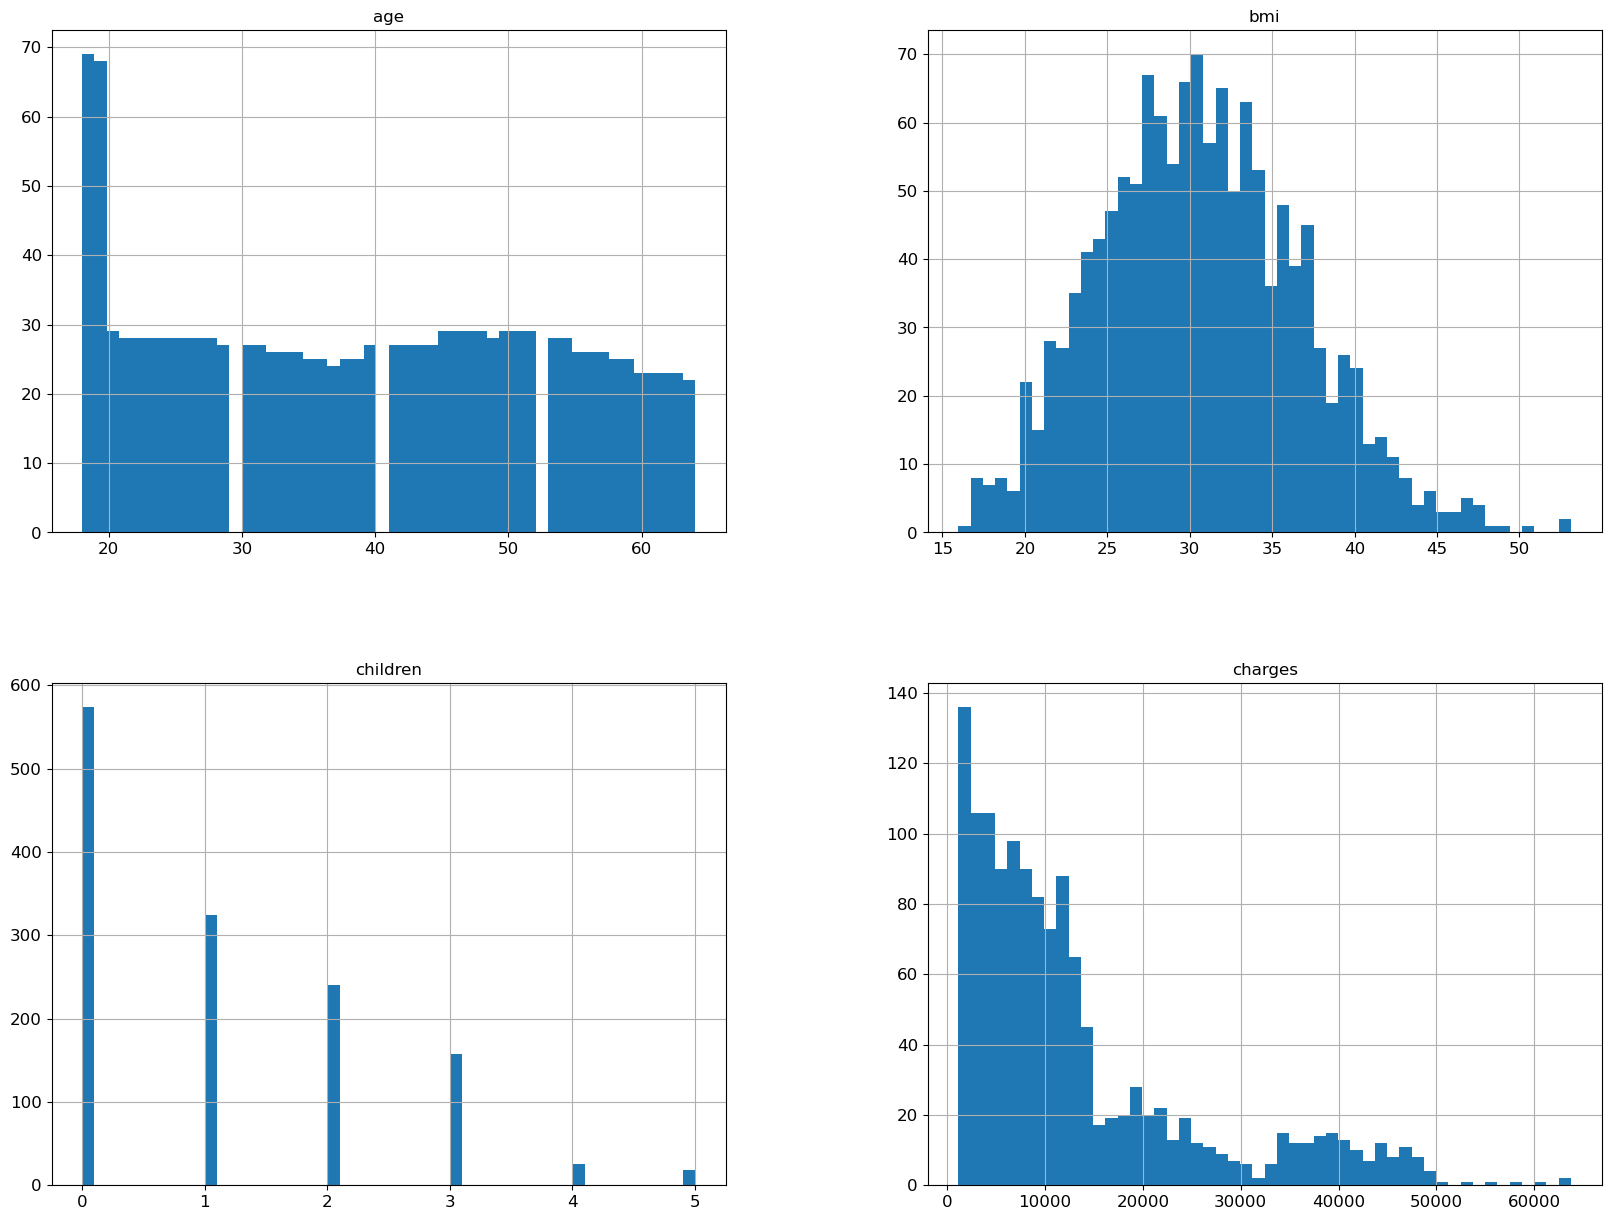

In [9]:
prima_seguro.hist(bins=50, figsize=(20,15))
plt.show()

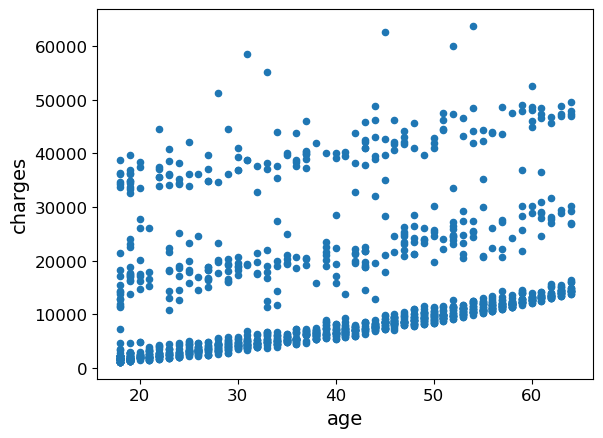

In [10]:
prima_seguro.plot(kind="scatter", x="age", y="charges");

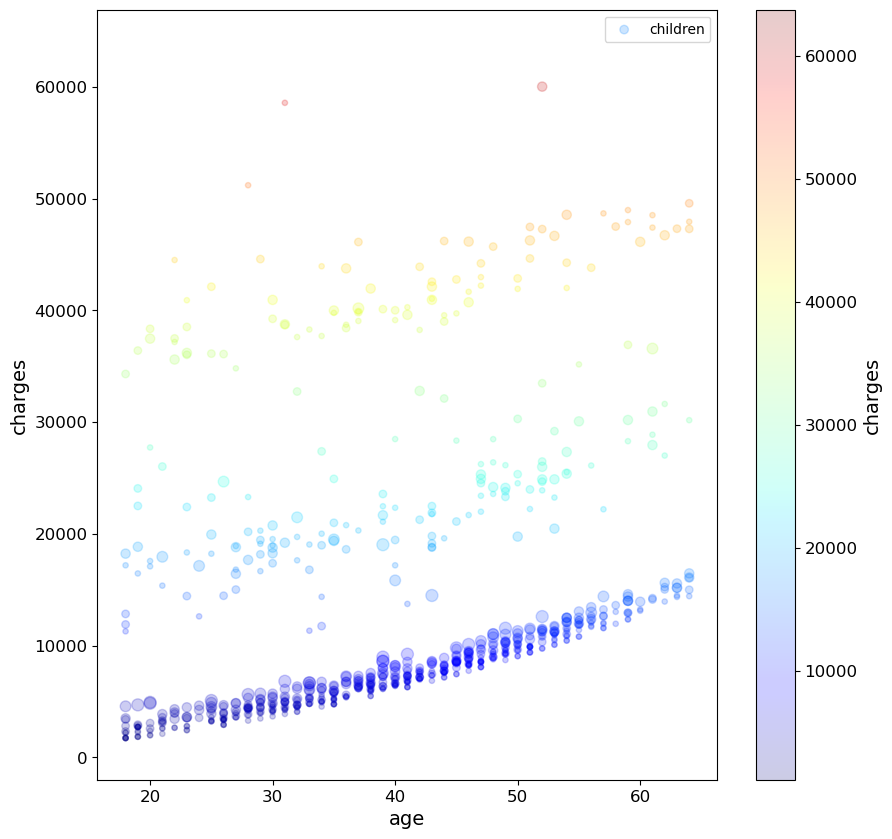

In [11]:
prima_seguro.plot(kind="scatter", x="age", y="charges", alpha=0.2,
            s=prima_seguro["children"]*15 , label="children", figsize=(10,10),
             c="charges", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False
            );

In [12]:
corr_matrix = prima_seguro.corr()
corr_matrix

,age,bmi,children,charges
age,1.000000,0.109616,0.042376,0.299102
bmi,0.109616,1.000000,0.012585,0.198730
children,0.042376,0.012585,1.000000,0.067998
charges,0.299102,0.198730,0.067998,1.000000


In [13]:
corr_matrix["charges"].sort_values(ascending=False)#ordeno la matriz correlación y escojo la columna que me interesa de forma no ascendentes

charges     1.000000
age         0.299102
bmi         0.198730
children    0.067998
Name: charges, dtype: float64

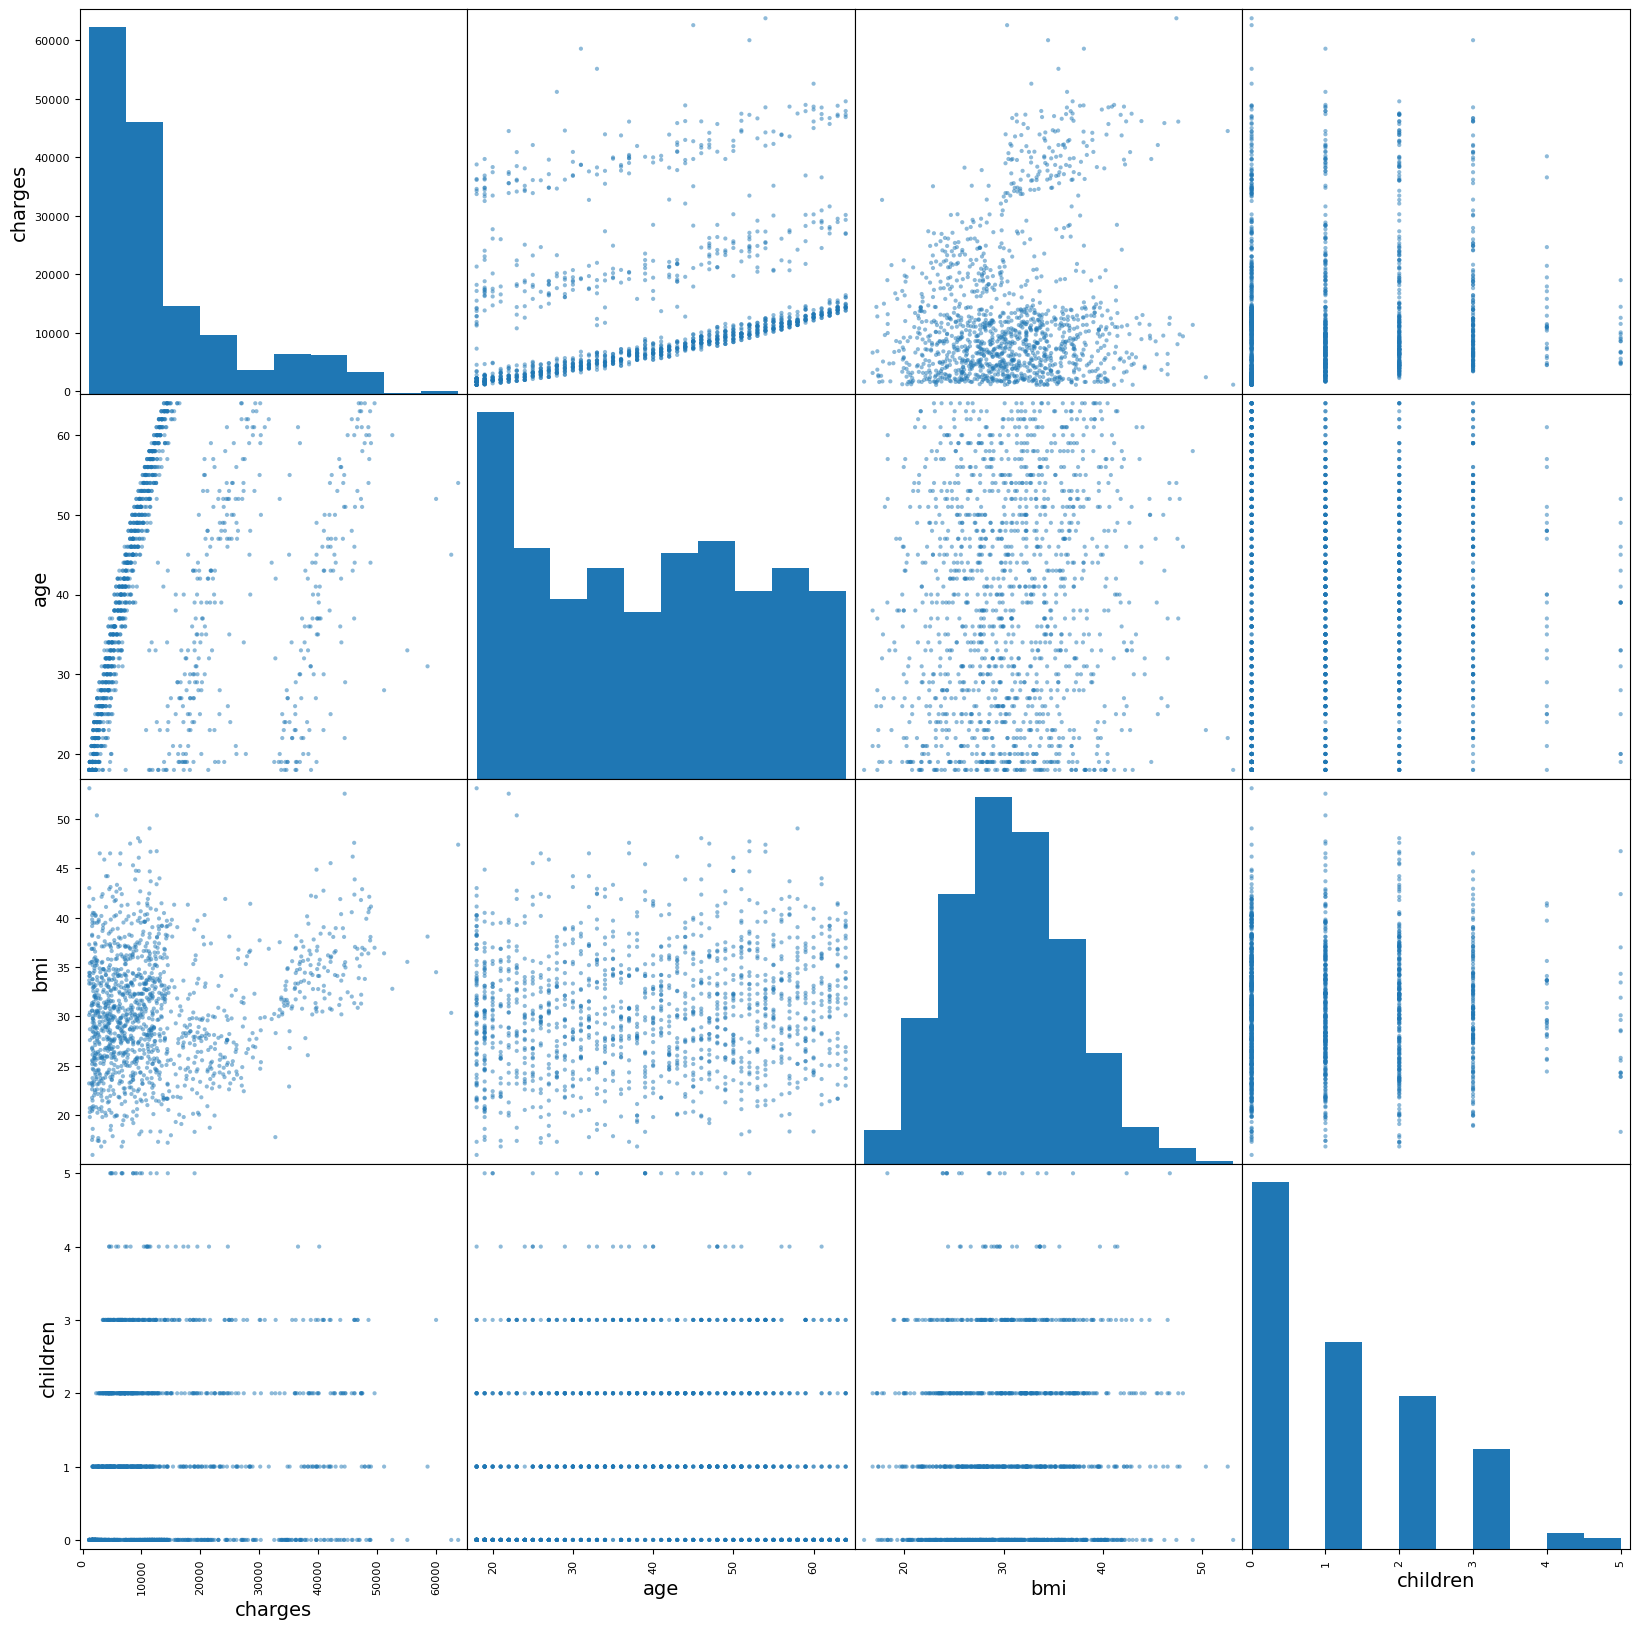

In [14]:
from pandas.plotting import scatter_matrix

attributes = ["charges" ,"age", "bmi", "children"]

scatter_matrix(prima_seguro[attributes], figsize=(20,20));

In [15]:
back_up=prima_seguro.copy()

In [16]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy="median") # Las celdas que están vacías las va rellenar con la media

In [17]:
#Le quitamos las columnas que son texto
region = prima_seguro["region"] # metes en region las columnas
prima_num =prima_seguro.drop("region", axis = 1)
prima_num2 =prima_num.drop ("smoker", axis = 1)
prima_num3 =prima_num2.drop ("sex", axis = 1)

In [18]:
prima_num3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   float64
 1   bmi       1337 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 41.9 KB


In [19]:
imputer.fit (prima_num3)#Completa con la media las que están vacias

SimpleImputer(strategy='median')

In [20]:
x = imputer.transform(prima_num3)#Transforma las columnas vacías

In [21]:
# Creamos un datafraim a partir de una matriz con los indices y columnas que le has dado
prima_transformado = pd.DataFrame(x, 
                          columns=prima_num3.columns,
                          index=prima_num3.index
                         )
prima_transformado.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   float64
 3   charges   1338 non-null   float64
dtypes: float64(4)
memory usage: 41.9 KB


In [22]:
prima_region=prima_seguro [ ["region" ] ]

prima_region

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest
...,...
1333,northwest
1334,northeast
1335,southeast
1336,southwest


In [23]:
# from sklearn.preprocessing import OrdinalEncoder

# ordinal_encoder = OrdinalEncoder()
# ordinal_encoder.fit(prima_region)
# ordinal_encoder.transform(prima_region)

In [24]:
# ordinal_encoder.categories_

In [25]:
from sklearn.preprocessing import OneHotEncoder;

cat_encoder = OneHotEncoder(sparse=False);
prima_region_1hot = cat_encoder.fit_transform(prima_region)
prima_region_1hot
# convierte las variables a codificación binaria 

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [26]:
# Hacemos una copia por si metemos la pata
backup=prima_transformado.copy();

#Volvemos a introdicir la columna region pero con cada uno de sus elementos, si es ese elemento tendrá un 1 
prima_transformado.reset_index(drop=True, inplace=True); # el drop en true es para que no aparezca el indice duplicado
prima_transformado=prima_transformado.join(pd.DataFrame(prima_region_1hot,columns=[cat for cat in cat_encoder.categories_[0]])); # Agregamos las buevas columnas

prima_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   float64
 1   bmi        1338 non-null   float64
 2   children   1338 non-null   float64
 3   charges    1338 non-null   float64
 4   northeast  1338 non-null   float64
 5   northwest  1338 non-null   float64
 6   southeast  1338 non-null   float64
 7   southwest  1338 non-null   float64
dtypes: float64(8)
memory usage: 83.8 KB


In [27]:
prima_transformado

,age,bmi,children,charges,northeast,northwest,southeast,southwest
0,19.0,27.900,0.0,16884.92400,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,1725.55230,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,4449.46200,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,21984.47061,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3.0,10600.54830,0.0,1.0,0.0,0.0
1334,18.0,31.920,0.0,2205.98080,1.0,0.0,0.0,0.0
1335,18.0,36.850,0.0,1629.83350,0.0,0.0,1.0,0.0
1336,21.0,25.800,0.0,2007.94500,0.0,0.0,0.0,1.0


In [28]:
prima_seguro


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [29]:
#Aislamos la columna para luego hacerle el onehotencoder
prima_smoker=prima_seguro [ [ "smoker" ] ]

prima_smoker

,smoker
0,yes
1,no
2,no
3,no
4,no
...,...
1333,no
1334,no
1335,no
1336,no


In [30]:
prima_seguro.info() # observamos que tiene un nulo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [31]:
# Gestinamos la columna smoker ya que tiene un nulo, y si hacemos el onehotencoder nos va a dar una columna nula
print(prima_smoker.value_counts()["no"]) # nos cuenta la cantidad de "no" fumadores hay
print(prima_smoker.value_counts()["yes"]) # nos cuenta la cantidad de  fumadores hay

# como hay mas "no fumadores", rellenmos ese nulo con un "no"
smoker_without_null = prima_smoker.fillna("no") # rellenamos ese nulo con un no
smoker_without_null.info()

1063
274
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   smoker  1338 non-null   object
dtypes: object(1)
memory usage: 10.6+ KB


In [32]:
from sklearn.preprocessing import OneHotEncoder;

cat_encoder = OneHotEncoder(sparse=False);
prima_smoker_1hot = cat_encoder.fit_transform(smoker_without_null)
prima_smoker_1hot
# convertimos a binario esa columna

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [33]:
# Hacemos una copia por si metemos la pata
backup=prima_transformado.copy();

#Volvemos a introdicir la columna smoker pero con cada uno de sus elementos, si es ese elemento tendrá un 1 
prima_region_smoker=prima_transformado.join(pd.DataFrame(prima_smoker_1hot,columns=[cat for cat in cat_encoder.categories_[0]]));

#renombramos las columnas "no" y "yes" 
prima_region_smoker.rename(columns={"no":"not a smoker", "yes":"is a smoker"}, inplace=True);

prima_region_smoker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   float64
 1   bmi           1338 non-null   float64
 2   children      1338 non-null   float64
 3   charges       1338 non-null   float64
 4   northeast     1338 non-null   float64
 5   northwest     1338 non-null   float64
 6   southeast     1338 non-null   float64
 7   southwest     1338 non-null   float64
 8   not a smoker  1338 non-null   float64
 9   is a smoker   1338 non-null   float64
dtypes: float64(10)
memory usage: 104.7 KB


In [34]:
prima_region_smoker

,age,bmi,children,charges,northeast,northwest,southeast,southwest,not a smoker,is a smoker
0,19.0,27.900,0.0,16884.92400,0.0,0.0,0.0,1.0,0.0,1.0
1,18.0,33.770,1.0,1725.55230,0.0,0.0,1.0,0.0,1.0,0.0
2,28.0,33.000,3.0,4449.46200,0.0,0.0,1.0,0.0,1.0,0.0
3,33.0,22.705,0.0,21984.47061,0.0,1.0,0.0,0.0,1.0,0.0
4,32.0,28.880,0.0,3866.85520,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3.0,10600.54830,0.0,1.0,0.0,0.0,1.0,0.0
1334,18.0,31.920,0.0,2205.98080,1.0,0.0,0.0,0.0,1.0,0.0
1335,18.0,36.850,0.0,1629.83350,0.0,0.0,1.0,0.0,1.0,0.0
1336,21.0,25.800,0.0,2007.94500,0.0,0.0,0.0,1.0,1.0,0.0


In [35]:
prima_seguro

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [36]:
# hacemos lo mismo con sex
prima_sex = prima_seguro [ [ "sex" ] ]
prima_sex

,sex
0,female
1,male
2,male
3,male
4,male
...,...
1333,male
1334,female
1335,female
1336,female


In [37]:
from sklearn.preprocessing import OneHotEncoder;

cat_encoder = OneHotEncoder(sparse=False);
prima_sex_1hot = cat_encoder.fit_transform(prima_sex)
prima_sex_1hot
# convierte las variables a codificación binaria 

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [38]:
# Hacemos una copia por si metemos la pata
backup=prima_region_smoker.copy();

#Volvemos a introdicir la columna sex pero con cada uno de sus elementos, si es ese elemento tendrá un 1 

prima_region_smoker_sex=prima_region_smoker.join(pd.DataFrame(prima_sex_1hot,columns=[cat for cat in cat_encoder.categories_[0]]));

prima_region_smoker_sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   float64
 1   bmi           1338 non-null   float64
 2   children      1338 non-null   float64
 3   charges       1338 non-null   float64
 4   northeast     1338 non-null   float64
 5   northwest     1338 non-null   float64
 6   southeast     1338 non-null   float64
 7   southwest     1338 non-null   float64
 8   not a smoker  1338 non-null   float64
 9   is a smoker   1338 non-null   float64
 10  female        1338 non-null   float64
 11  male          1338 non-null   float64
dtypes: float64(12)
memory usage: 125.6 KB


In [39]:
prima_region_smoker_sex

,age,bmi,children,charges,northeast,northwest,southeast,southwest,not a smoker,is a smoker,female,male
0,19.0,27.900,0.0,16884.92400,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,18.0,33.770,1.0,1725.55230,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,28.0,33.000,3.0,4449.46200,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,33.0,22.705,0.0,21984.47061,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,32.0,28.880,0.0,3866.85520,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3.0,10600.54830,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1334,18.0,31.920,0.0,2205.98080,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1335,18.0,36.850,0.0,1629.83350,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1336,21.0,25.800,0.0,2007.94500,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


## Prima del seguro con datos limpios

In [40]:
prima_seguro_clean = prima_region_smoker_sex
prima_seguro_clean

,age,bmi,children,charges,northeast,northwest,southeast,southwest,not a smoker,is a smoker,female,male
0,19.0,27.900,0.0,16884.92400,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,18.0,33.770,1.0,1725.55230,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,28.0,33.000,3.0,4449.46200,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,33.0,22.705,0.0,21984.47061,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,32.0,28.880,0.0,3866.85520,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3.0,10600.54830,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1334,18.0,31.920,0.0,2205.98080,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1335,18.0,36.850,0.0,1629.83350,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1336,21.0,25.800,0.0,2007.94500,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [41]:
prima_seguro_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   float64
 1   bmi           1338 non-null   float64
 2   children      1338 non-null   float64
 3   charges       1338 non-null   float64
 4   northeast     1338 non-null   float64
 5   northwest     1338 non-null   float64
 6   southeast     1338 non-null   float64
 7   southwest     1338 non-null   float64
 8   not a smoker  1338 non-null   float64
 9   is a smoker   1338 non-null   float64
 10  female        1338 non-null   float64
 11  male          1338 non-null   float64
dtypes: float64(12)
memory usage: 125.6 KB


# Entrenamos el modelo

### Creamos el test y el train set

In [42]:
# plantamos una semilla
np.random.seed(42)

In [43]:
def split_train_test(data, test_ratio):
    test_set_size  =int(len(prima_seguro_clean)*test_ratio) #Ponemos que lea nuestra prima de seguro con los datos limpios
    shuffle_indices=np.random.permutation(len(data))
    test_indices   =shuffle_indices[:test_set_size]
    train_indices  =shuffle_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [44]:
X_train, X_test = split_train_test(prima_seguro_clean, 0.20)#divides los conjuntos y el test se queda con el 20 %
len(X_train), len(X_test)
#nos olvidamos de las test 

(1071, 267)

In [45]:
y_train = X_train["charges"].copy() # El valor es el que quieres predecir 

X_train = X_train.drop("charges", axis=1) # quitamos ese valor de nuestro train

In [46]:
X_train # nuestro train sin la columna charges (a predecir)

,age,bmi,children,northeast,northwest,southeast,southwest,not a smoker,is a smoker,female,male
846,51.0,34.200,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
560,46.0,19.950,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1285,47.0,24.320,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1142,52.0,24.860,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
969,39.0,34.320,5.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18.0,31.350,4.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1130,39.0,23.870,5.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1294,58.0,25.175,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
860,37.0,47.600,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [47]:
y_train

846      9872.70100
560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1071, dtype: float64

# Entrenando y evaluando con los diferentes algoritmos

#### Regresión lineal (linear regression)

In [48]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)




LinearRegression()

In [49]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6104.49046073156

#### Árbol de Decisión (Decision Tree)

In [50]:
#Árbol de decisicion (lo entrenamos)
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [51]:
predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


493.97520812856715

#### Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [53]:
predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1879.4417540476895

#### SVM

In [54]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)


SVR(kernel='linear')

In [55]:
predictions = svm_reg.predict(X_train)
svm_mse = mean_squared_error(y_train, predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

12790.205824782119

#### Xgboost

In [56]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_reg.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=64,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
predictions = xgb_reg.predict(X_train)
xgb_mse = mean_squared_error(y_train, predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

911.4945289394868

## Aplicando el crosvalidation a todos 

In [58]:
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) 

scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_reg_scores = np.sqrt(-scores)
lin_reg_scores

array([6050.50447944, 6581.05962909, 5234.07421039, 6046.73196443,
       5835.3050353 , 6125.15236075, 7293.29226213, 6321.74490659,
       6193.24309954, 5637.60316035])

In [59]:
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_reg_scores = np.sqrt(-scores)
tree_reg_scores

array([5971.58633873, 6745.87866801, 6941.3307968 , 6580.89181329,
       7070.00150208, 5994.60075292, 7719.02496651, 7305.37114267,
       7115.9992263 , 5412.26316385])

In [60]:
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_reg_scores = np.sqrt(-scores)
forest_reg_scores

array([4841.33573492, 5283.36852081, 3862.79467721, 4487.03197521,
       5288.47141111, 5012.296733  , 5988.32060141, 5458.06858862,
       5129.50042979, 4685.33707585])

In [61]:
svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)

scores = cross_val_score(svm_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
svm_reg_scores = np.sqrt(-scores)
svm_reg_scores

array([13062.37677994, 12585.46861095, 12571.66680226, 15088.17752062,
       12909.79023361, 10554.17018398, 13111.46598345, 12522.96382539,
       12899.05790476, 12338.14487608])

In [62]:
xgb_reg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_reg.fit(X_train, y_train)

scores = cross_val_score(xgb_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
xgb_reg_scores = np.sqrt(-scores)
xgb_reg_scores

array([5479.21324626, 5579.0318258 , 4186.87756424, 5346.66305272,
       5608.51601657, 5061.38752081, 6345.26559064, 6021.81260514,
       5381.87758725, 5302.28619943])

## Vemos la desviación del modelo

In [63]:
def display_score(scores):
    print(f"Scores: {scores}")
    print(f"Mean: ({scores.mean()})")
    print(f"Standard devition: ({scores.std()})")

In [64]:
display_score(lin_reg_scores)

Scores: [6050.50447944 6581.05962909 5234.07421039 6046.73196443 5835.3050353
 6125.15236075 7293.29226213 6321.74490659 6193.24309954 5637.60316035]
Mean: (6131.871110800951)
Standard devition: (523.7073474739162)


In [65]:
display_score(tree_reg_scores)

Scores: [5971.58633873 6745.87866801 6941.3307968  6580.89181329 7070.00150208
 5994.60075292 7719.02496651 7305.37114267 7115.9992263  5412.26316385]
Mean: (6685.694837115114)
Standard devition: (668.8623982879777)


In [66]:
display_score(forest_reg_scores)

Scores: [4841.33573492 5283.36852081 3862.79467721 4487.03197521 5288.47141111
 5012.296733   5988.32060141 5458.06858862 5129.50042979 4685.33707585]
Mean: (5003.6525747920705)
Standard devition: (552.0385240255467)


In [67]:
display_score(svm_reg_scores)

Scores: [13062.37677994 12585.46861095 12571.66680226 15088.17752062
 12909.79023361 10554.17018398 13111.46598345 12522.96382539
 12899.05790476 12338.14487608]
Mean: (12764.328272103307)
Standard devition: (1041.2838790503783)


In [68]:
display_score(xgb_reg_scores)

Scores: [5479.21324626 5579.0318258  4186.87756424 5346.66305272 5608.51601657
 5061.38752081 6345.26559064 6021.81260514 5381.87758725 5302.28619943]
Mean: (5431.293120886209)
Standard devition: (543.2528982566283)


## Resultados finales

In [69]:
print("Tipo de regresión         media         desviación estandar")
print("============================================================")
print(f"Regresion lineal : ({lin_reg_scores.mean(), lin_reg_scores.std()})")
print(f"Árbol de desición: ({tree_reg_scores.mean(), tree_reg_scores.std()})")
print(f"Random Forest    : ({forest_reg_scores.mean(), forest_reg_scores.std()})")
print(f"SVM              : ({svm_reg_scores.mean(), svm_reg_scores.std()})")
print(f"Xgboost          : ({xgb_reg_scores.mean(), xgb_reg_scores.std()})")

Tipo de regresión         media         desviación estandar
Regresion lineal : ((6131.871110800951, 523.7073474739162))
Árbol de desición: ((6685.694837115114, 668.8623982879777))
Random Forest    : ((5003.6525747920705, 552.0385240255467))
SVM              : ((12764.328272103307, 1041.2838790503783))
Xgboost          : ((5431.293120886209, 543.2528982566283))


### Los datos nos indican que el random forest es el que ha tenido mejores resultados

In [70]:
# .. testeamos el modelo obtenido

y_test = X_test["charges"].copy() # El valor es el que quieres predecir 

X_test = X_test.drop("charges", axis=1) # quitamos ese valor de nuestro test
# print (X_test)
# print (y_test)

final_predictions = forest_reg.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse




4649.824634047545